In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 2.8 MB 66.1 MB/s 
     |████████████████████████████████| 981 kB 48.6 MB/s 
     |████████████████████████████████| 468 kB 57.2 MB/s 
     |████████████████████████████████| 263 kB 64.2 MB/s 
     |████████████████████████████████| 1.2 MB 4.7 MB/s 
     |████████████████████████████████| 22.3 MB 57.0 MB/s 
     |████████████████████████████████| 3.3 MB 52.9 MB/s 
     |████████████████████████████████| 101 kB 10.1 MB/s 
     |████████████████████████████████| 596 kB 68.8 MB/s 
     |████████████████████████████████| 880 kB 48.3 MB/s 
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=ec401297b413dcb3fe4719c8e1f91e3d4664f2ddebe7a12fb5e406837b7415b3
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b0

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:
from google.colab import files
upload = files.upload()

Saving dataset for resnet 2 - sheet1.csv to dataset for resnet 2 - sheet1.csv


In [ ]:
a=pd.read_csv(r"/content/dataset for resnet 2 - sheet1.csv")

In [ ]:
a

,Unnamed: 0,graph,compressed Image Name,Unnamed: 3,PSNR,Compression Ratio,rank,name,path
0,1m,1mg,1mc,NaN,100.97,60.45,240,1m.jpeg,/content/drive/MyDrive/image dataset/1m.jpeg
1,2m,2mg,2mc,NaN,97.97,57.93,230,2m.jpeg,/content/drive/MyDrive/image dataset/2m.jpeg
2,3m,3mg,3mc,NaN,103.75,75.76,300,3m.jpeg,/content/drive/MyDrive/image dataset/3m.jpeg
3,4m,4mg,4mc,NaN,102.98,75.56,300,4m.jpeg,/content/drive/MyDrive/image dataset/4m.jpeg
4,5m,5mg,5mc,NaN,101.01,45.00,180,5m.jpeg,/content/drive/MyDrive/image dataset/5m.jpeg
...,...,...,...,...,...,...,...,...,...
1545,1546m,1546mg,1546mc,NaN,99.11,51.06,280,1546m.jpeg,/content/drive/MyDrive/image dataset/1546m.jpeg
1546,1547m,1547mg,1547mc,NaN,96.81,51.06,280,1547m.jpeg,/content/drive/MyDrive/image dataset/1547m.jpeg
1547,1548m,1548mg,1548mc,NaN,98.71,51.06,280,1548m.jpeg,/content/drive/MyDrive/image dataset/1548m.jpeg
1548,1549m,1549mg,1549mc,NaN,98.00,51.06,280,1549m.jpeg,/content/drive/MyDrive/image dataset/1549m.jpeg


In [ ]:
image_dir=Path("/content/drive/MyDrive/image dataset")

In [ ]:
filepaths=pd.Series(list(image_dir.glob(r"**/*.jpeg")),name='Filepath').astype(str)
nm=pd.Series(filepaths.apply(lambda x: os.path.split(x)[1]), name="name")

In [ ]:
filepaths

0          /content/drive/MyDrive/image dataset/324m.jpeg
1          /content/drive/MyDrive/image dataset/327m.jpeg
2          /content/drive/MyDrive/image dataset/325m.jpeg
3          /content/drive/MyDrive/image dataset/326m.jpeg
4          /content/drive/MyDrive/image dataset/329m.jpeg
                              ...                        
2980    /content/drive/MyDrive/image dataset/chest_xra...
2981    /content/drive/MyDrive/image dataset/chest_xra...
2982    /content/drive/MyDrive/image dataset/chest_xra...
2983    /content/drive/MyDrive/image dataset/chest_xra...
2984    /content/drive/MyDrive/image dataset/chest_xra...
Name: Filepath, Length: 2985, dtype: object

In [ ]:
img= pd.DataFrame(nm)

In [ ]:
c=a.iloc[:,[6,7]]

In [ ]:
filepaths=pd.DataFrame(filepaths)

In [ ]:
img2=pd.concat([filepaths,img],axis=1)

In [ ]:
img3=pd.merge(img2,c,on='name')

In [ ]:
img3

,Filepath,name,rank
0,/content/drive/MyDrive/image dataset/313m.jpeg,313m.jpeg,200
1,/content/drive/MyDrive/image dataset/315m.jpeg,315m.jpeg,120
2,/content/drive/MyDrive/image dataset/316m.jpeg,316m.jpeg,130
3,/content/drive/MyDrive/image dataset/317m.jpeg,317m.jpeg,130
4,/content/drive/MyDrive/image dataset/318m.jpeg,318m.jpeg,170
...,...,...,...
1499,/content/drive/MyDrive/image dataset/310m.jpeg,310m.jpeg,100
1500,/content/drive/MyDrive/image dataset/309m.jpeg,309m.jpeg,120
1501,/content/drive/MyDrive/image dataset/312m.jpeg,312m.jpeg,110
1502,/content/drive/MyDrive/image dataset/311m.jpeg,311m.jpeg,110


In [ ]:
images=img3.iloc[:,[0,2]]

In [ ]:
image_df=images.sample(frac=1.0,random_state=1).reset_index(drop=True)

In [ ]:
image_df

,Filepath,rank
0,/content/drive/MyDrive/image dataset/675m.jpeg,230
1,/content/drive/MyDrive/image dataset/390m.jpeg,290
2,/content/drive/MyDrive/image dataset/252m.jpeg,360
3,/content/drive/MyDrive/image dataset/448m.jpeg,280
4,/content/drive/MyDrive/image dataset/1023m.jpeg,500
...,...,...
1499,/content/drive/MyDrive/image dataset/1287m.jpeg,30
1500,/content/drive/MyDrive/image dataset/1498m.jpeg,300
1501,/content/drive/MyDrive/image dataset/916m.jpeg,230
1502,/content/drive/MyDrive/image dataset/555m.jpeg,190


In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
train_df,test_df=train_test_split(image_df,train_size=0.8,shuffle=True,random_state=1)

In [ ]:
(train_data,test_data,preproc)=vis.images_from_csv(r"/content/dataset for resnet 2 - sheet1.csv","path",label_columns=['rank '],is_regression=True, )

['rank ']
      rank 
1483  500.0
1441  240.0
1424  100.0
38    300.0
547   400.0
['rank ']
      rank 
338   210.0
118   210.0
1136  370.0
677   390.0
1219  320.0
Found 1353 validated image filenames.
Found 151 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:723: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  + "If this is incorrect, change accordingly."
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 42 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
model=vis.image_regression_model('pretrained_resnet50',train_data=train_data,val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94781440/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner=ktrain.get_learner(model=model,train_data=train_data,val_data=test_data,batch_size=64)

In [ ]:
learner.fit_onecycle(2e-4,40)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/40
22/22 [==============================] - 69s 3s/step - loss: 98588.1953 - mae: 285.9511 - val_loss: 81119.0078 - val_mae: 260.9597
Epoch 2/40
22/22 [==============================] - 51s 2s/step - loss: 85306.0078 - mae: 261.5347 - val_loss: 67989.4297 - val_mae: 234.4832
Epoch 3/40
22/22 [==============================] - 51s 2s/step - loss: 70635.9609 - mae: 231.6501 - val_loss: 54264.5352 - val_mae: 203.1337
Epoch 4/40
22/22 [==============================] - 51s 2s/step - loss: 56202.0000 - mae: 197.9615 - val_loss: 41445.2227 - val_mae: 170.6100
Epoch 5/40
22/22 [==============================] - 51s 2s/step - loss: 43186.0234 - mae: 163.8255 - val_loss: 31200.3516 - val_mae: 142.5460
Epoch 6/40
22/22 [==============================] - 51s 2s/step - loss: 33699.8242 - mae: 137.2201 - val_loss: 24076.9980 - val_mae: 121.8107
Epoch 7/40
22/22 [==============================] - 51s 2s/step - loss: 27138.8320 -

In [ ]:
learner.freeze(15)
learner.fit_onecycle(3e-4,40)



begin training using onecycle policy with max lr of 0.0003...
Epoch 1/40
22/22 [==============================] - 62s 2s/step - loss: 10776.1914 - mae: 70.6303 - val_loss: 20188.4473 - val_mae: 116.5841
Epoch 2/40
22/22 [==============================] - 55s 2s/step - loss: 4741.1523 - mae: 44.7426 - val_loss: 22315.8418 - val_mae: 124.9955
Epoch 3/40
22/22 [==============================] - 54s 2s/step - loss: 3627.0103 - mae: 36.9450 - val_loss: 23587.3535 - val_mae: 128.9731
Epoch 4/40
22/22 [==============================] - 55s 2s/step - loss: 3777.5491 - mae: 35.5256 - val_loss: 17705.4004 - val_mae: 109.6154
Epoch 5/40
22/22 [==============================] - 54s 2s/step - loss: 2172.3628 - mae: 28.0995 - val_loss: 22052.9023 - val_mae: 123.2882
Epoch 6/40
22/22 [==============================] - 54s 2s/step - loss: 3064.5315 - mae: 32.2965 - val_loss: 18511.6250 - val_mae: 111.8743
Epoch 7/40
22/22 [==============================] - 54s 2s/step - loss: 2944.1228 - mae: 32.491

In [ ]:
predictor=ktrain.get_predictor(learner.model,preproc)

In [ ]:
test_data.filenames[10:20]

['/content/drive/MyDrive/image dataset/1360m.jpeg',
 '/content/drive/MyDrive/image dataset/471m.jpeg',
 '/content/drive/MyDrive/image dataset/1070m.jpeg',
 '/content/drive/MyDrive/image dataset/26m.jpeg',
 '/content/drive/MyDrive/image dataset/111m.jpeg',
 '/content/drive/MyDrive/image dataset/379m.jpeg',
 '/content/drive/MyDrive/image dataset/277m.jpeg',
 '/content/drive/MyDrive/image dataset/1047m.jpeg',
 '/content/drive/MyDrive/image dataset/408m.jpeg',
 '/content/drive/MyDrive/image dataset/1367m.jpeg']

In [ ]:
def show_prediction(fname):
  pred=round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print(pred)


261


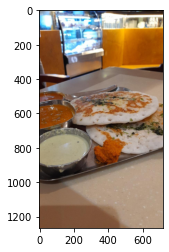

In [ ]:
show_prediction('/content/drive/MyDrive/image dataset/try2.jpeg')

In [ ]:
predicted_rank=np.squeeze(model.predict(test_data))
true_rank=test_data.labels
rmse=np.sqrt(model.evaluate(test_data,verbose=0))
#print("Test RMSE: {:.5f}".format(rmse))
print(rmse)
r2=r2_score(true_rank,predicted_rank)
print("Test R^2: {:.5f}".format(r2))

[94.98902075  8.52800804]
Test R^2: 0.30315


505
272
305
506
206
122
352
266
290
369
235
458
318
327
369
226
329
348
290
346
287
314
362
260
359
297
297
331
264
263
213


ValueError: ignored

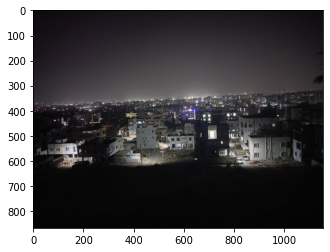

In [ ]:
for x in range(1,1500):
  show_prediction("/content/drive/MyDrive/image dataset/{}m.jpeg".format(x))
  #print(x)